In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn') #ggplot

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

pd.options.mode.chained_assignment = None  # default='warn'

# Dataset

In this part, you will use the car evaluation database, which was  derived from a simple hierarchical decision model. (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The model uses six attributes:

*   buying: Car Buying Price. This attribute has four values: vhigh, high, med, low.
*   maint: Price of the Maintenance.  This attribute has four values: vhigh, high, med, low.
*   doors: Number of Doors. This attribute has four values: 2, 3, 4, 5-more.
*   persons: Capacity in terms of persons to carry. This attribute has three values: 2, 4, more.
*   lug_boot: The Size of Luggage Boot. This attribute has three values: small, med, big.
*   safety: Estimated Safety of the Car. This attribute has three values: low, med, high.

Using the above attributes, it is required to use a decision tree to evalute the car into one of the given values:


*   unacc: Unacceptable
*   acc: Acceptable
*   good: Good
*   vgood: Very Good

In [2]:
data = pd.read_csv('car.csv')

In [3]:
df = data.copy()

In [4]:
df
# df.shape

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,car_acc
1327,low,vhigh,3,2,med,med,unacc
1315,low,vhigh,2,more,small,med,unacc
1217,med,low,3,2,small,high,unacc
232,vhigh,med,2,4,big,med,acc
1074,med,high,5more,more,med,low,unacc


In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['car_acc'])

In [7]:
train.head()

,buying,maint,doors,persons,lug_boot,safety,car_acc
643,high,high,5more,more,med,med,acc
1276,med,low,5more,2,big,med,unacc
1591,low,med,4,more,big,med,good
96,vhigh,vhigh,5more,4,big,low,unacc
1638,low,low,2,more,small,low,unacc


In [8]:
train.describe()

,buying,maint,doors,persons,lug_boot,safety,car_acc
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,4
top,low,high,2,more,big,low,unacc
freq,350,359,350,465,468,470,968


In [9]:
for i in train.columns:
    print(train[i].value_counts())
    print("................................")

low      350
high     349
vhigh    346
med      337
Name: buying, dtype: int64
................................
high     359
vhigh    343
low      340
med      340
Name: maint, dtype: int64
................................
2        350
4        348
5more    344
3        340
Name: doors, dtype: int64
................................
more    465
2       459
4       458
Name: persons, dtype: int64
................................
big      468
med      463
small    451
Name: lug_boot, dtype: int64
................................
low     470
high    457
med     455
Name: safety, dtype: int64
................................
unacc    968
acc      307
good      55
vgood     52
Name: car_acc, dtype: int64
................................


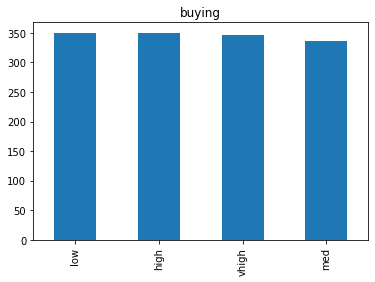

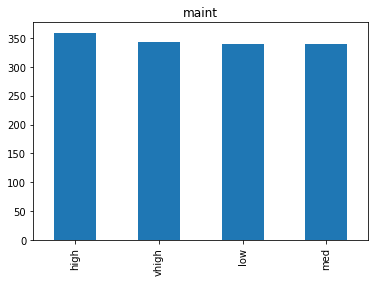

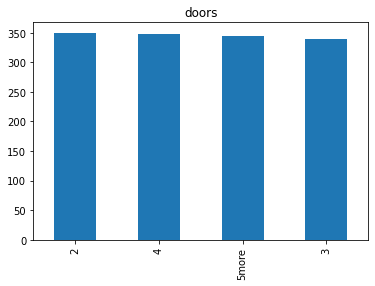

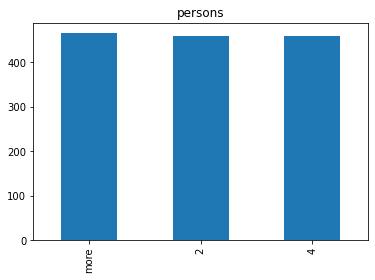

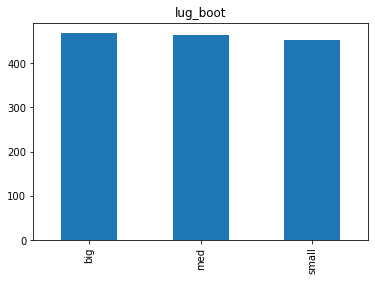

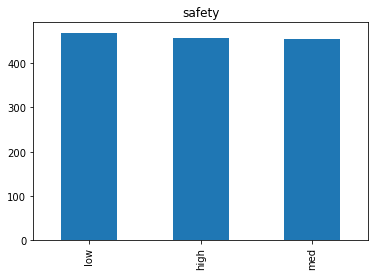

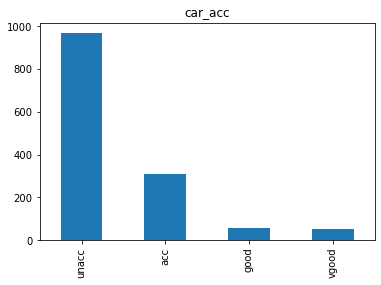

In [10]:
for i in train.columns:
    train[i].value_counts().plot(kind='bar', title=i)
    plt.show()

* Transform features categorical values into numerical values and change data type from 'str' to 'int' 

In [11]:
doors = {'1':1, '2':2, '3':3, '4':4, '5more':5}
train['doors'] = train['doors'].map(doors)
test['doors'] = test['doors'].map(doors)

In [12]:
train.describe()
#test.describe()

,doors
count,1382.000000
mean,3.496382
std,1.120373
min,2.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,5.000000


In [13]:
persons = {'2':2, '4':4, 'more':5}
train['persons'] = train['persons'].map(persons)
test['persons'] = test['persons'].map(persons)

In [14]:
train.describe()
#test.describe()

,doors,persons
count,1382.000000,1382.000000
mean,3.496382,3.672214
std,1.120373,1.248464
min,2.000000,2.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,4.000000,5.000000
max,5.000000,5.000000


In [15]:
buying = {'low':0, 'med':1, 'high':2, 'vhigh':3, '5more':5}
train['buying'] = train['buying'].map(buying)
test['buying'] = test['buying'].map(buying)

maint = {'low':0, 'med':1, 'high':2, 'vhigh':3, '5more':5}
train['maint'] = train['maint'].map(maint)
test['maint'] = test['maint'].map(maint)

lug_boot = {'small':0, 'med':1, 'big':2}
train['lug_boot'] = train['lug_boot'].map(lug_boot)
test['lug_boot'] = test['lug_boot'].map(lug_boot)

safety = {'low':0, 'med':1, 'high':2}
train['safety'] = train['safety'].map(safety)
test['safety'] = test['safety'].map(safety)

In [16]:
train.describe()
#test.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,1.500000,1.510130,3.496382,3.672214,1.012301,0.990593
std,1.121671,1.113201,1.120373,1.248464,0.815664,0.819246
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000
75%,2.750000,2.000000,4.000000,5.000000,2.000000,2.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000


* Transform labels categorical values into numerical values and change data type from 'str' to 'int' 

In [17]:
car_acc = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}  
train['car_acc'] = train['car_acc'].map(car_acc)
test['car_acc'] = test['car_acc'].map(car_acc)

In [18]:
train.describe()
#test.describe()

,buying,maint,doors,persons,lug_boot,safety,car_acc
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,1.500000,1.510130,3.496382,3.672214,1.012301,0.990593,0.414616
std,1.121671,1.113201,1.120373,1.248464,0.815664,0.819246,0.740582
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.750000,2.000000,4.000000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


In [19]:
# train.boxplot(figsize=(20,15))

<AxesSubplot:>

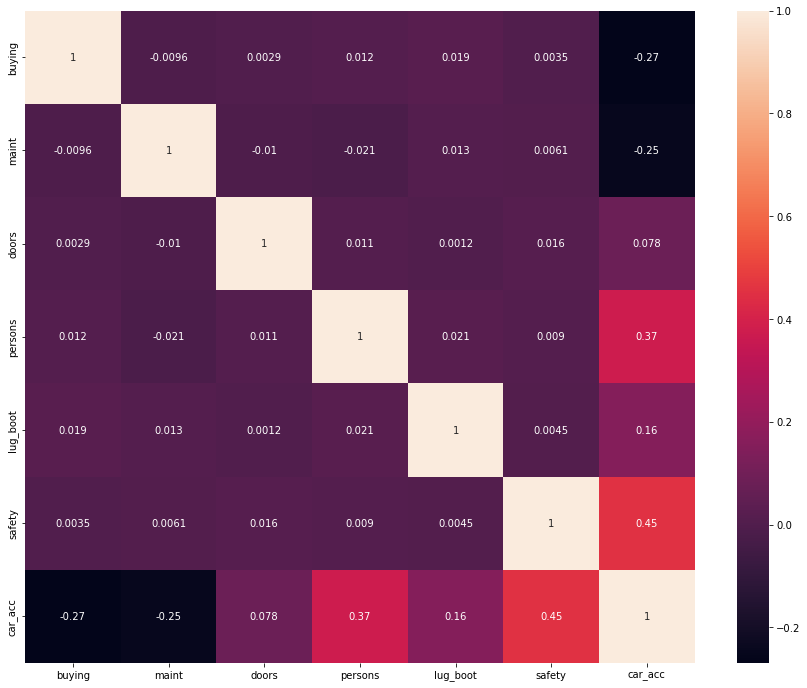

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True)

In [21]:
# sns.pairplot(train, hue='car_acc')

# Modeling

In [22]:
X_train = train.drop('car_acc', axis=1)
y_train = train['car_acc']

X_test = test.drop('car_acc', axis=1)
y_test = test['car_acc']

### * Train the model --------> Using (DecisionTreeClassifier)
#### Then --> Predict 'car_acc' from train data NOT test data

In [23]:
clf1 = DecisionTreeClassifier()    # max_depth=5, min_samples_leaf=4
clf1.fit(X_train,y_train) # Learn
y_pred_training = clf1.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training))  # Overfitting

accuracy_score train :  1.0


In [24]:
print( export_text(clf1, feature_names=list(X_train.columns)) )

|--- safety <= 0.50
|   |--- class: 0
|--- safety >  0.50
|   |--- persons <= 3.00
|   |   |--- class: 0
|   |--- persons >  3.00
|   |   |--- buying <= 1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |--- lug_boot <= 0.50
|   |   |   |   |   |   |--- doors <= 2.50
|   |   |   |   |   |   |   |--- persons <= 4.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- persons >  4.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- doors >  2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- lug_boot >  0.50
|   |   |   |   |   |   |--- maint <= 0.50
|   |   |   |   |   |   |   |--- doors <= 3.50
|   |   |   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |   |   |--- persons <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- persons >  4.50
|   |   |   |   |   |   |   |   |   |   |--- doors <= 2.50
| 

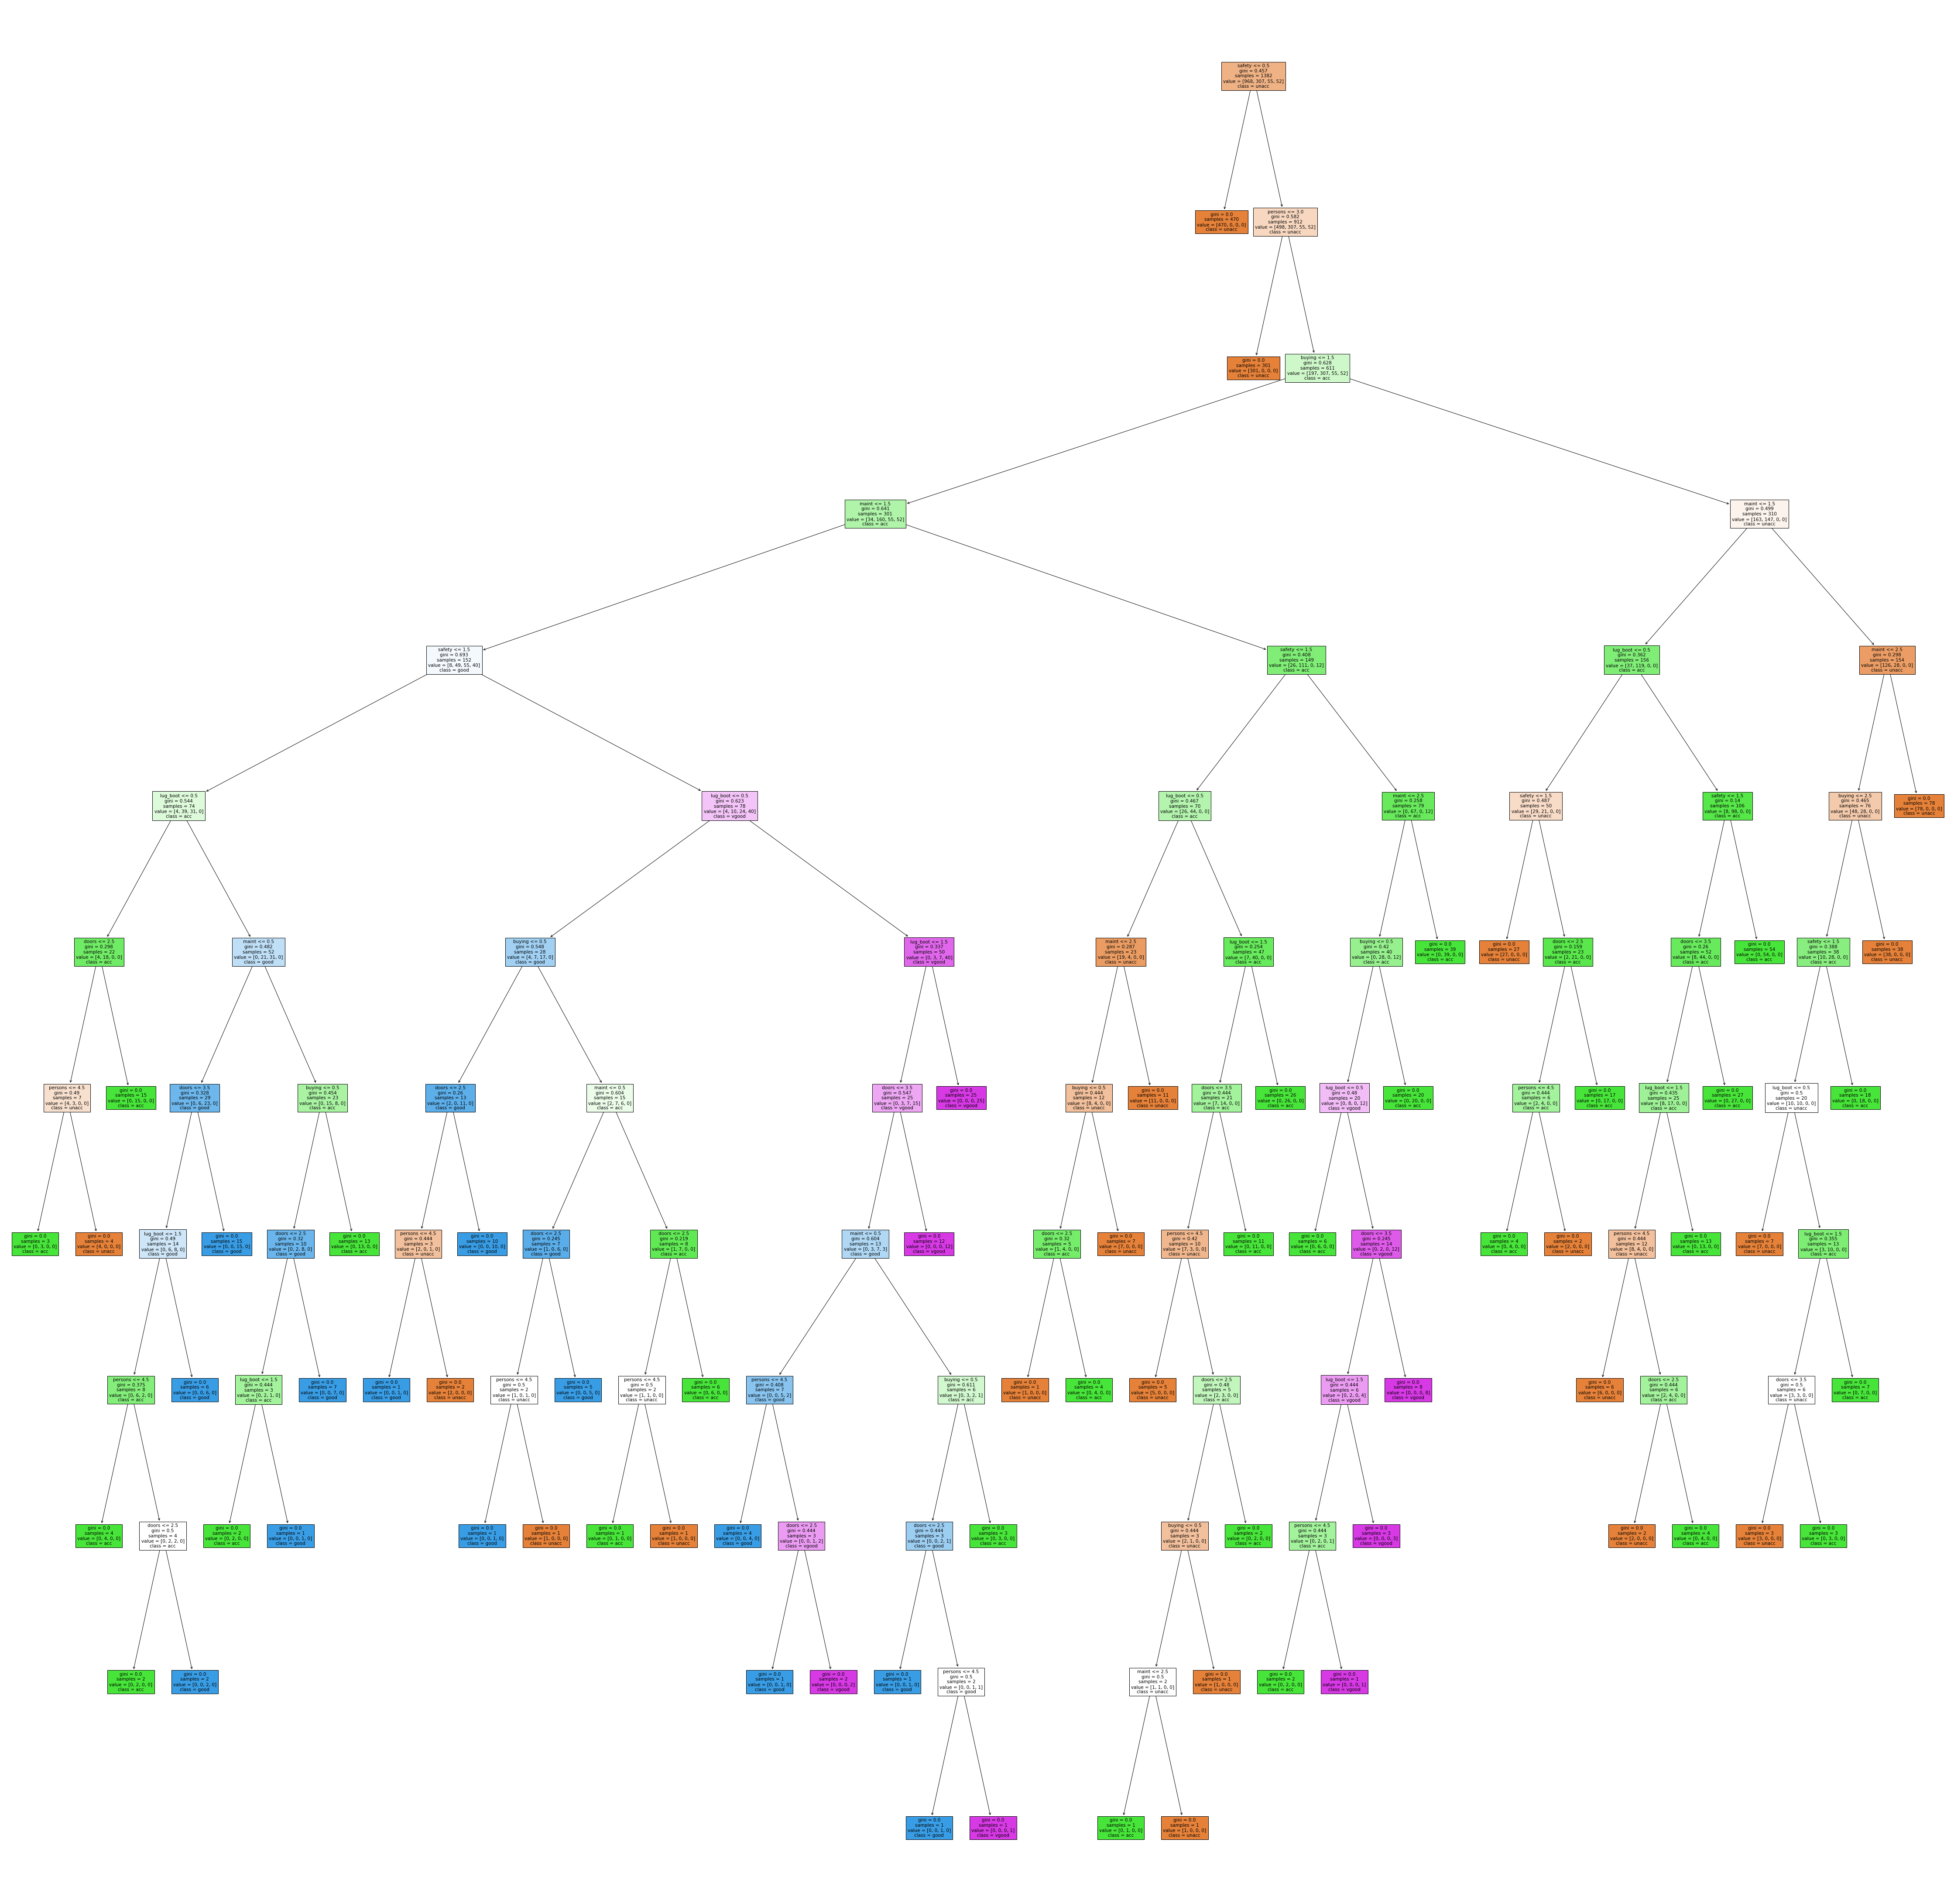

In [25]:
fig = plt.figure(figsize=(80,80))
plot_tree( clf1, feature_names=list(X_train.columns), class_names=list(car_acc.keys()), filled=True )    # car_acc.keys()=> values car_acc column
plt.show()

### * Train the model --------> Using (RandomForestClassifier)
#### Then --> Predict 'car_acc' from train data NOT test data

In [26]:
clf2 = RandomForestClassifier(random_state=0, oob_score=True)
clf2.fit(X_train,y_train) # Learn
y_pred_training = clf2.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training))   # Overfitting

accuracy_score train :  1.0


##### clf2.oob_score_
* In this way, it is as the model Predict 'car_acc' from  data that it has not seen before ---> SO the model don't need to predict 'car_acc' from X-test

In [27]:
clf2.oob_score_

0.9782923299565847

##### clf2.feature_importances_
* Show the important features use in the model

In [28]:
features_important = clf2.feature_importances_
features_important

array([0.16192898, 0.14348756, 0.05578255, 0.24269066, 0.08396164,
       0.3121486 ])

<AxesSubplot:>

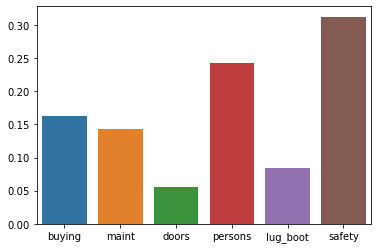

In [29]:
sns.barplot(y=features_important, x=list(X_train.columns))

### * Train the model --------> Using (AdaBoostClassifie) ---> It is not model => But, it takes a weak model and makes that a super model
#### Then --> Predict 'car_acc' from train data NOT test data

In [30]:
clf3 = AdaBoostClassifier(random_state=0, n_estimators=100, learning_rate=0.5) # Can use this parameter => DecisionTreeClassifier(max_depth=8) -> this make (AdaBoostClassifie):Super model
clf3.fit(X_train,y_train) # Learn
y_pred_training = clf3.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training))

accuracy_score train :  0.8408104196816208


### * Train the model --------> Using (GradientBoostingClassifier)
#### Then --> Predict 'car_acc' from train data NOT test data

In [31]:
clf4 = GradientBoostingClassifier(random_state=0) # learning_rate=0.5
clf4.fit(X_train,y_train) # Learn
y_pred_training = clf4.predict(X_train)
# y_pred_training
print("accuracy_score train : ", accuracy_score(y_train,y_pred_training))   # Perfect

accuracy_score train :  0.9956584659913169


## Conclusion
### From four algorithms (DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifie, GradientBoostingClassifier) ---> Can know that 'GradientBoostingClassifier' is the best algorithm ---> Because the model in this classifier has high performance accuracy between (X_train & y_pred_training)

#### Predict 'car_acc' from test data using 'DecisionTreeClassifier'

In [32]:
y_pred_test = clf1.predict(X_test)
print("accuracy_score train : ", accuracy_score(y_test,y_pred_test))

accuracy_score train :  0.9653179190751445


#### Predict 'car_acc' from test data using 'RandomForestClassifier'

In [33]:
y_pred_test = clf2.predict(X_test)
print("accuracy_score train : ", accuracy_score(y_test,y_pred_test))

accuracy_score train :  0.9624277456647399


#### Predict 'car_acc' from test data using 'AdaBoostClassifie'

In [34]:
y_pred_test = clf3.predict(X_test)
print("accuracy_score train : ", accuracy_score(y_test,y_pred_test))

accuracy_score train :  0.8439306358381503


#### Predict 'car_acc' from test data using 'GradientBoostingClassifier'

In [37]:
y_pred_test = clf4.predict(X_test)
print("accuracy_score train : ", accuracy_score(y_test,y_pred_test))

accuracy_score train :  0.9971098265895953


In [36]:
#train.T